# Single Hidden Layer Neural Network

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.io

import pathlib
import os

In [54]:
home_dir = pathlib.Path("/c/Users/thsiao3/Documents/emory_class/MATH789/hw4/")
data_dir = home_dir / "PeaksClassification.mat"

In [55]:
os.chdir(home_dir)
# Custom modules. utils holds functions for the softmax and derivative Test. 
import singleLayerNNObjFun
import utils

singleLayerNNObjFun = singleLayerNNObjFun.singleLayerNNObjFun

Setting up datasets

In [56]:
Y = scipy.io.loadmat(data_dir)
Ytrain = Y['Ytrain']
Ytest = Y['Ytest']
Ctrain = Y['Ctrain']
Ctest = Y['Ctest']

## Test Derivatives

Set up a test single layer NN

In [ ]:
m = 10
n_f, n = Ytrain.shape
n_c = Ctrain.shape[0]

K = np.random.randn(m, n_f)
W = np.random.randn(n_c, m)
b = 10 * np.ones((m, 1))

x = np.vstack((np.reshape(K, (-1, 1)), b, np.reshape(W, (-1, 1))))
D = np.random.randn(x.shape[0], 1)

Define functions needed to pass to scipy.optimize. Loss and Jacobian

In [58]:
def f(x, Y, C, m):
    return singleLayerNNObjFun(x, Y, C, m)[0]

def jac(x, Y, C, m):
    return singleLayerNNObjFun(x, Y, C, m)[1] 

In [59]:
h = np.array([2e-10, 2e-8, 2e-7, 2e-6, 2e-5, 2e-4, 2e-3, 2e-1, 1])
d1, d2 = utils.derivativeTest(f, jac, h, x, D, Y=Ytrain, C=Ctrain, m=m)

Text(0, 0.5, '$\\log(\\Delta E)$')

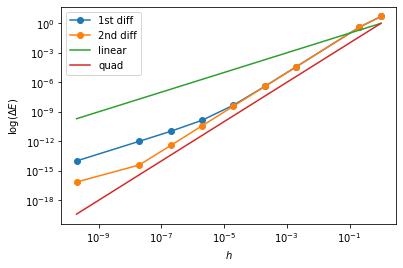

In [60]:
plt.plot(h, abs(d1), marker="o", label="1st diff")
plt.plot(h, abs(d2), marker="o", label="2nd diff")
plt.plot(h, h, label="linear")
plt.plot(h, h**2, label="quad")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$h$")
plt.ylabel("$\log(\Delta E)$")

The second order difference has a slope close to 2, showing that the computed gradient is close to correct. 

# Solving Optimization

Set up the single layer model for use with scipy

In [97]:
m = 50
n_f, n = Ytrain.shape
n_c = Ctrain.shape[0]

K = np.random.randn(m, n_f)
W = np.random.randn(n_c, m)
b = 10 * np.ones((m, 1))

x = np.vstack((np.reshape(K, (-1, 1)), b, np.reshape(W, (-1, 1))))

In [ ]:
sol = scipy.optimize.minimize(method="L-BFGS-B", fun=f, args=(Ytrain, Ctrain, m), x0=x, jac=jac)
ans = sol['x']

Define a prediction function for the model

In [106]:
def predict(x, Ytest, m):
    n_f, n = Ytest.shape
    
    K = ans[0:(m*n_f)]
    b = ans[(m*n_f):(m*n_f + m)]
    W = ans[(m*n_f + m):]

    K = np.reshape(K, (m, n_f))
    b = np.reshape(b, (m, 1))
    W = np.reshape(W, (-1, m))

    Z = np.tanh(K @ Ytest + b @ np.ones((1, n)))

    A = utils.softmax(W, Z)
    preds = np.argmax(A, 0)
    
    return preds

In [119]:
print("Training Accuracy: {}".format(np.mean(predict(ans, Ytrain, m) == np.argmax(Ctrain, 0))))

Training Accuracy: 0.98


In [120]:
print("Testing Accuracy: {}".format(np.mean(predict(ans, Ytest, m) == np.argmax(Ctest, 0))))

Testing Accuracy: 0.976


In [121]:
# Model Preds grid
x = np.arange(-3,3.1,.05)
y = np.arange(-3,3.1,.05)
Grid = np.array([np.array([a, b]) for a in x for b in y]).T

In [122]:
preds = predict(x, Grid, m)

[]

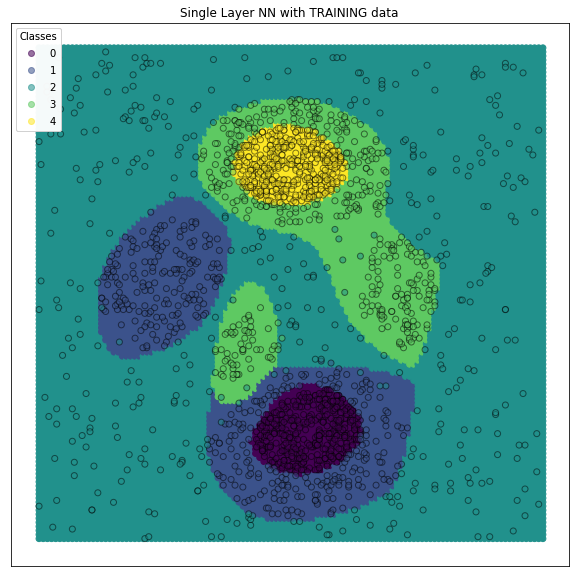

In [125]:
colors = np.argmax(Ctrain, 0)
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(Grid[0], Grid[1], c=preds)
ax.set_title("Single Layer NN with TRAINING data")
scatter = ax.scatter(Ytrain[0], Ytrain[1], c=colors, alpha=0.5, edgecolors='black')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])

[]

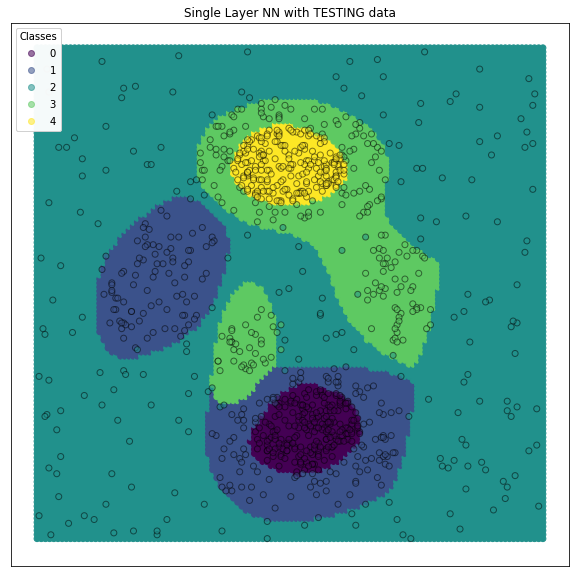

In [126]:
colors = np.argmax(Ctest, 0)
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(Grid[0], Grid[1], c=preds)
ax.set_title("Single Layer NN with TESTING data")
scatter = ax.scatter(Ytest[0], Ytest[1], c=colors, alpha=0.5, edgecolors='black')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])

I was able to beat my ELM accuracy by still using the tanh activation function, but increasing the number of hidden nodes to 50.
The accuracy improves by a couple percentage points, from 0.977 training accuracy in ELM to 0.98 and test accuracy from 0.965 to 
0.976.